# Data Visualisation and Data Preprocessing 

CONTENT

1. Data Loading
2. Data Analysis
3. Data Visualization
4. Train Test Split with Random Sampling
5. Train Test Split with Stratified Sampling
6. Correlations
7. *Feature Extraction(Use existing features to make some new modified features, for ex, f1+f2-f3) 
8. Data Conversion from Text to Numeric
9. Data Cleaning
10. Classification Models

In [ ]:
import pandas as pd
# Many more modules imported later 

In [360]:
dt = pd.read_csv("Data.csv")

In [361]:
dt.head()

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,2110407,Yes,14.0,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18.0,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [ ]:
expected 50% hike 
offered 320 
IF 100
150
420
difference  = (420 - 150 ) /150 = 1.8 
180%

In [320]:
len(dt)

12333

Rename Columns for clean code

In [362]:
dt = dt.rename(columns={"Candidate Ref":"id","DOJ Extended":"extended","Duration to accept offer":"duration",
                   "Notice period":"notice","Offered band":"band","Pecent hike expected in CTC":"expected",
                   "Percent hike offered in CTC":"offered","Percent difference CTC":"difference",
                   "Joining Bonus":"bonus","Candidate relocate actual":"relocate","Gender":"gender",
                   "Candidate Source":"source","Rex in Yrs":"experience","LOB":"lob","Location":"location","Age":"age",
                   "Status":"status"})

### Understand the data more

In [322]:
dt.head()

,id,extended,duration,notice,band,expected,offered,difference,bonus,relocate,gender,source,experience,lob,location,age,status
0,2110407,Yes,14.0,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18.0,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [323]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 17 columns):
id            12333 non-null int64
extended      12333 non-null object
duration      9614 non-null float64
notice        12333 non-null int64
band          12333 non-null object
expected      11586 non-null float64
offered       11737 non-null float64
difference    11482 non-null float64
bonus         12333 non-null object
relocate      12333 non-null object
gender        12333 non-null object
source        12333 non-null object
experience    12333 non-null int64
lob           12333 non-null object
location      12333 non-null object
age           12333 non-null int64
status        12333 non-null object
dtypes: float64(4), int64(4), object(9)
memory usage: 1.6+ MB


In [ ]:
#QUESTION WHAT CAN YOU INFER FROM ABOVE - ? 


In [ ]:
# Some of the columns have *missing* values - duration, offered, expected, difference

# Out of 17 cols, 7 are continous variables, 10 are categorical 
# out of 7, it includes identifier, age, duration in days, expected ctc, offered ctc, difference, experience in years,
# out of 10 categorical vars, 5 are binary 
# 

In [324]:
len(dt.id.unique())
#All entries are unique , no candidate is repeated. 

12333

Explore the different columns distribution

In [325]:
dt.extended.value_counts(normalize=True)

No     0.588583
Yes    0.411417
Name: extended, dtype: float64

In [326]:
dt.notice.value_counts()

30     6285
60     2364
0      1792
90      901
45      718
75      191
120      82
Name: notice, dtype: int64

In [ ]:
#QUESTION - Should notice be categorical or continuous variable ? 
# - categorical variables have limited number of possibilities/ domain
# Seeing this it seems "notice" should be categorical variable BUT 




In [ ]:
# - categorical variables do not have any order between them 
# There is an inherent order between the values in notice column
# 0<30<45<60<75<90<120

In [ ]:
# THINK about column/variables with True/False or Yes/No values 
# 0 and 1 
# What should we do to them ? 

In [327]:
dt.location.value_counts()

Chennai       4289
Noida         3898
Bangalore     2865
Hyderabad      505
Mumbai         251
Gurgaon        189
Kolkata        143
Coimbatore      87
Pune            76
Others          15
Cochin           8
Ahmedabad        7
Name: location, dtype: int64

In [328]:
#STATUS is our true variable for supervised learning model like decision tree
dt.status.value_counts(normalize=True)

Joined        0.707452
Not Joined    0.292548
Name: status, dtype: float64

Different locations opted

In [330]:
dt.location.unique()

array(['Noida', 'Chennai', 'Gurgaon', 'Bangalore', 'Kolkata', 'Mumbai',
       'Hyderabad', 'Cochin', 'Pune', 'Others', 'Coimbatore', 'Ahmedabad'],
      dtype=object)

In [329]:
len(dt.location.unique())

12

**Data analysis NOT yet finished**

### Visualization  

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt

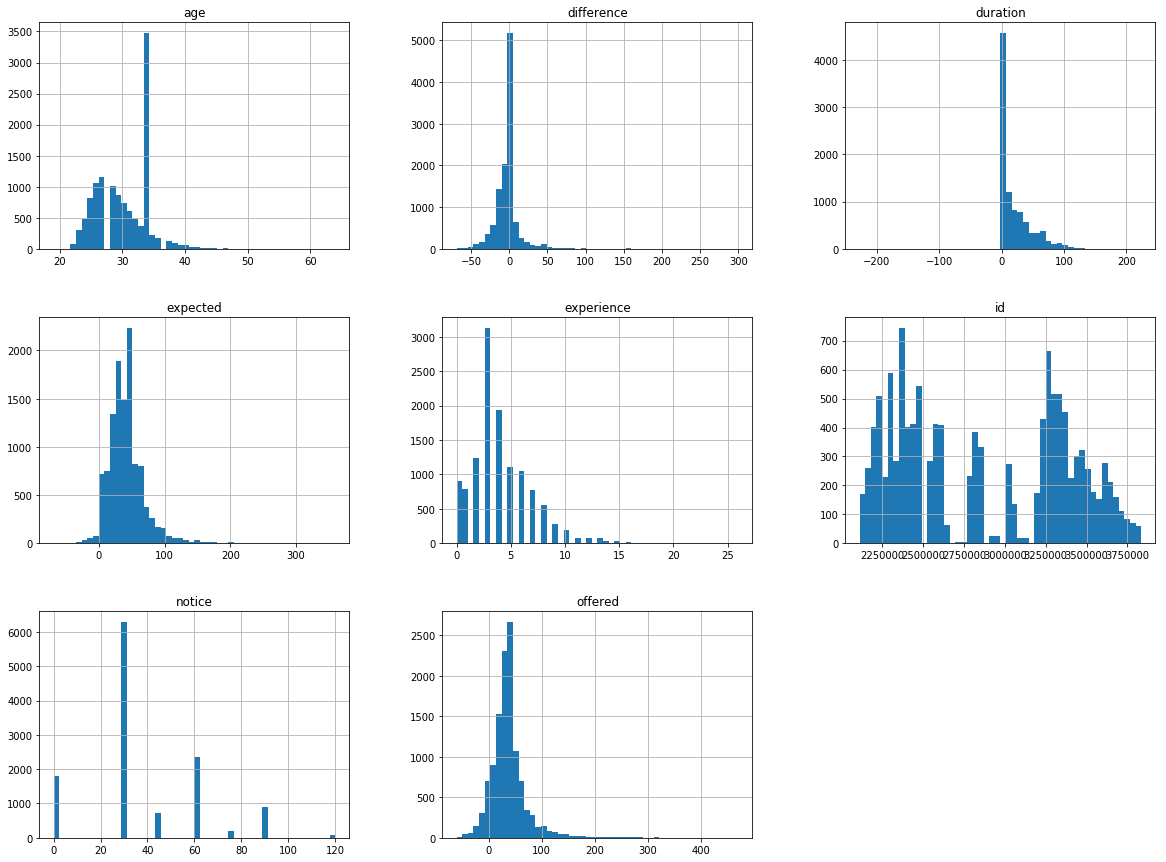

In [331]:
dt.hist(bins=50, figsize=(20,15))

plt.show()

In [332]:
dt.age.value_counts()

34    3472
27    1152
26    1055
28    1008
29     866
25     824
30     741
31     617
24     485
32     474
33     368
23     306
35     228
36     170
37     122
38      95
22      85
39      65
40      59
41      34
42      30
43      16
45      12
44       8
46       7
48       5
47       5
50       5
21       5
49       4
51       3
19       2
20       2
64       1
60       1
62       1
Name: age, dtype: int64

In [ ]:
#offered and expected follow similar normal distribution 
# notice has 30 days as the most common value
# experience - most of the ppl are 3-4 years experienced 

In [363]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
dt_cat = dt["status"]
dt_cat_encoded = en.fit_transform(dt_cat)
dt["status_en"] = dt_cat_encoded
dt.drop(columns=["status"],axis=1,inplace=True)

# PREPROCESSING HAPPENS AFTER THE TRAIN-TEST SPLIT....
# PREPROCESSING HAPPENS ON THE TRAIN DATA

In [ ]:
import numpy as np

In [333]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))   #Get random indices from 1 to n
    test_set_size = int(len(data) * test_ratio)           # Standard followed is 20% of entire dataset is test set
    test_indices = shuffled_indices[:test_set_size]         
    train_indices = shuffled_indices[test_set_size:]      
    return data.iloc[train_indices], data.iloc[test_indices] 


In [ ]:
dt["extra_col"] = np.ceil(dt["offered"] / 10)            # Divide into categories
dt["extra_col"].where(dt["extra_col"] < 10, 10.0 , inplace=True) # Just take 

In [364]:
train_set, test_set = split_train_test(dt, 0.2)
print(len(train_set), "train +", len(test_set), " test")


9867 train + 2466  test


New Test set every time - 

Why is it a problem !? - 

2 possible solutions - 

a. save the train and test set 

b. select test set with some hash function on an identifier 

In [335]:
import hashlib 
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_col, hash=hashlib.md5):
    ids = data[id_col]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

dt_with_id = dt.reset_index()
train_set, test_set = split_train_test_by_id(dt_with_id,0.2, "index")

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dt, test_size=0.2, random_state=42)

In [ ]:
h(<DATA_ROW_id_1> ) = 50
h(dfe) = 52
h(xyz) = 64 

We did random sampling above. 

Usually it should be STRATIFED sampling to have good results.  

In [336]:
#Stratified sampling check for various columns like this - 
# for col in columns_to_check:
#     ...

In [ ]:
# dt["extra_col"] = np.ceil(dt["experience"] / 2.5)            # Divide into categories
# dt["extra_col"].where(dt["extra_col"] < 5, 5.0 , inplace=True) # Just take income less than 5

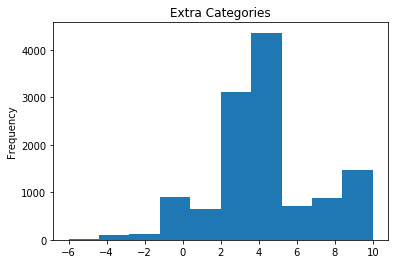

In [337]:
dt["extra_col"].plot(kind="hist",title="Extra Categories")

In [338]:
dt.extra_col.value_counts(normalize=True)

 5.0     0.193140
 4.0     0.160707
 3.0     0.147896
 2.0     0.103868
 10.0    0.101841
 6.0     0.057731
 1.0     0.053434
 0.0     0.052623
 7.0     0.044434
 8.0     0.027001
-1.0     0.021244
 9.0     0.017352
-2.0     0.009892
-3.0     0.004297
-4.0     0.003487
-5.0     0.000892
-6.0     0.000162
Name: extra_col, dtype: float64

In [341]:
test_set.extra_col.value_counts(normalize=True)

 5.0     0.201946
 4.0     0.153690
 3.0     0.146796
 10.0    0.100568
 2.0     0.096918
 6.0     0.059205
 1.0     0.057583
-0.0     0.056367
 7.0     0.047040
 8.0     0.025142
-1.0     0.023520
 9.0     0.014193
-2.0     0.008516
-3.0     0.004461
-4.0     0.003244
-6.0     0.000406
-5.0     0.000406
Name: extra_col, dtype: float64

In [342]:
train_set.extra_col.value_counts(normalize=True)

 5.0     0.190939
 4.0     0.162461
 3.0     0.148171
 2.0     0.105605
 10.0    0.102159
 6.0     0.057363
 1.0     0.052397
-0.0     0.051687
 7.0     0.043782
 8.0     0.027465
-1.0     0.020675
 9.0     0.018141
-2.0     0.010236
-3.0     0.004257
-4.0     0.003547
-5.0     0.001013
-6.0     0.000101
Name: extra_col, dtype: float64

In [ ]:
#IF test set doesn't represent all classes as like entire dataset, then 

In [ ]:
# Library.Module => function
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
import sklearn.model_selection as sample

#VALIDATION - k folds , if k = 5, 
object_declared = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in object_declared.split(dt, dt["extra_col"]):
    strat_train_set = dt.loc[train_index]
    strat_test_set = dt.loc[test_index]
    
#ANOTHER WAY
# sample.StratifiedShuffleSplit(...)


In [ ]:
strat_test_set.extra_col.value_counts(normalize=True)

In [ ]:
for df in (strat_train_set, strat_test_set):
    df.drop(["extra_col"], axis=1, inplace=True)

In [ ]:
for df in (train_set, test_set):
    df.drop(["extra_col"], axis=1, inplace=True)

In [366]:
dt = train_set.copy() #ONLY ON TRAIN SET 

In [367]:
dt.head(15)

,id,extended,duration,notice,band,expected,offered,difference,bonus,relocate,gender,source,experience,lob,location,age,status_en
2558,2309904,No,NaN,60,E1,69.01,47.89,-12.50,No,No,Female,Direct,3,ERS,Chennai,26,1
8048,3250522,Yes,42.0,30,E1,28.57,28.57,0.00,No,No,Male,Agency,3,BFSI,Bangalore,27,0
333,3267491,No,1.0,30,E1,80.56,69.44,-6.15,No,No,Male,Employee Referral,1,ERS,Bangalore,30,0
8822,3299382,Yes,6.0,45,E1,105.26,105.26,0.00,No,No,Female,Agency,2,ERS,Chennai,24,0
7269,3046411,No,24.0,90,E2,41.18,29.41,-8.33,No,No,Male,Employee Referral,6,AXON,Noida,31,1
11979,3687033,No,1.0,0,E2,73.33,77.78,2.56,No,Yes,Male,Employee Referral,4,INFRA,Bangalore,34,0
6834,2862302,No,13.0,30,E2,2.22,-21.33,-23.04,No,Yes,Male,Direct,5,ERS,Chennai,27,0
12297,3815952,Yes,NaN,0,E0,0.00,22.63,22.63,No,No,Female,Direct,0,BSERV,Chennai,34,1
5070,2552437,No,1.0,30,E1,38.89,38.89,0.00,No,No,Male,Direct,3,INFRA,Noida,28,0
15,2158703,No,44.0,75,E2,45.45,60.00,10.00,No,No,Male,Direct,8,INFRA,Noida,34,1


In [368]:
print(en.classes_)

['Joined' 'Not Joined']


In [ ]:
#NOT_JOINED = 1
#    JOINED = 0

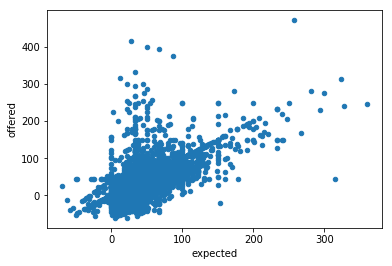

In [369]:
dt.plot(kind="scatter", x="expected", y="offered")


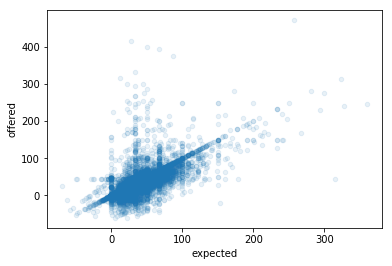

In [370]:
dt.plot(kind="scatter", x="expected", y="offered",alpha=0.1)
# Highlight high Density zone, (Default alpha=0.1)

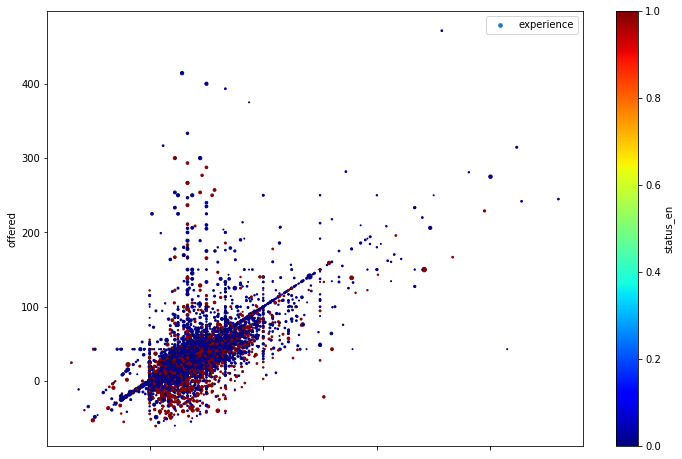

In [373]:
ax = dt.plot(kind="scatter", x="expected", y="offered",alpha=1,
            s=dt["experience"], label="experience", 
            c="status_en",cmap=plt.get_cmap("jet"),  colorbar=True,figsize=(12,8))

#Play with columns = [duration, experience, age, difference,notice]
plt.legend()
# ax.set_xlabel("expected")


In [ ]:
# What insights can you draw from this visual ? 

# Most of the candidates who did not join were offered less than what they expected (below the x=y line)
# Most of the candidates who did not join looks like having more experience from the circle radius 
# If candidates are offered more than what they expected, 
# they do not join if expectation in percent hike was less than 50-75%, 
# Most of the red balls are wider/fatter than most of the blue balls 
# (More experience ppl have more chances of not joining)

/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


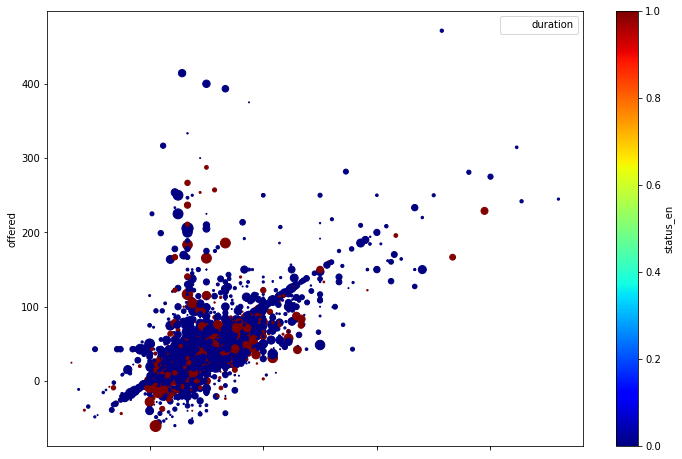

In [378]:
ax = dt.plot(kind="scatter", x="expected", y="offered",alpha=1,
            s=dt["duration"], label="duration", 
            c="status_en", cmap=plt.get_cmap("jet"), colorbar=True,figsize=(12,8))

#Play with columns = [duration, experience, age, difference,notice]
plt.legend()

In [ ]:
# difference can be negative too, hence all the circles above the x=y lines are shown as y-x >=0
# if circle radius is higher, there are lower chances of not joining(red balls)


In [376]:
dt.groupby("status_en").experience.agg("mean")

status_en
0    3.984961
1    4.585789
Name: experience, dtype: float64

In [377]:
dt.groupby("status_en").experience.agg("median")

status_en
0    3
1    4
Name: experience, dtype: int64

In [379]:
dt.groupby("status_en").duration.agg("mean") 
# Ppl not joining takes more time to decide OR
# If someone is taking too much time to decide, more likely that person will not join

status_en
0    20.490463
1    24.426740
Name: duration, dtype: float64

In [380]:
dt.groupby("status_en").difference.agg("mean") 


status_en
0   -1.069494
1   -5.133361
Name: difference, dtype: float64

In [381]:
dt.groupby("status_en").difference.agg("median") 
# If offered is less than expected, 

status_en
0    0.0
1   -4.0
Name: difference, dtype: float64

In [383]:
dt.head()

,id,extended,duration,notice,band,expected,offered,difference,bonus,relocate,gender,source,experience,lob,location,age,status_en
2558,2309904,No,NaN,60,E1,69.01,47.89,-12.50,No,No,Female,Direct,3,ERS,Chennai,26,1
8048,3250522,Yes,42.0,30,E1,28.57,28.57,0.00,No,No,Male,Agency,3,BFSI,Bangalore,27,0
333,3267491,No,1.0,30,E1,80.56,69.44,-6.15,No,No,Male,Employee Referral,1,ERS,Bangalore,30,0
8822,3299382,Yes,6.0,45,E1,105.26,105.26,0.00,No,No,Female,Agency,2,ERS,Chennai,24,0
7269,3046411,No,24.0,90,E2,41.18,29.41,-8.33,No,No,Male,Employee Referral,6,AXON,Noida,31,1


In [384]:
corr_mtx = dt.drop(columns=["id"]).corr()

In [385]:
corr_mtx["status_en"].sort_values(ascending=False)

status_en     1.000000
notice        0.247075
experience    0.096826
duration      0.060661
expected     -0.005263
age          -0.052136
offered      -0.073732
difference   -0.089571
Name: status_en, dtype: float64

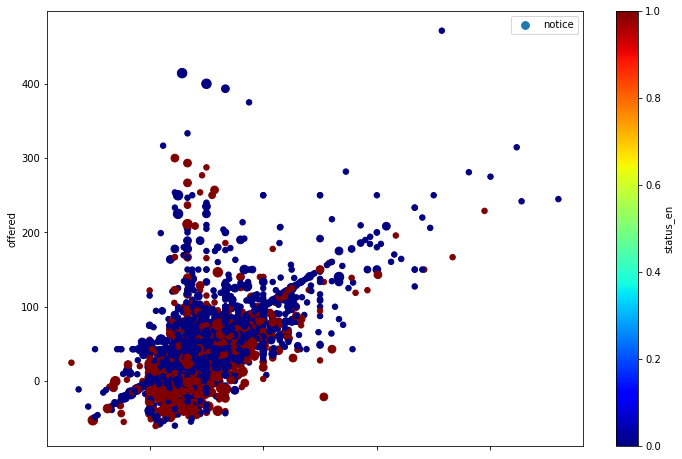

In [386]:
ax = dt.plot(kind="scatter", x="expected", y="offered",alpha=1,
            s=dt["notice"], label="notice", 
            c="status_en", cmap=plt.get_cmap("jet"), colorbar=True,figsize=(12,8))

plt.legend()

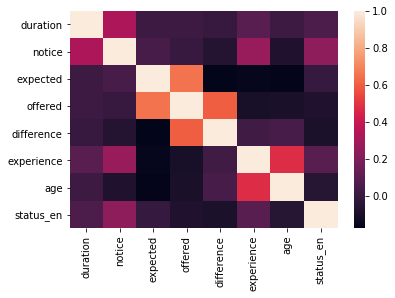

In [387]:
import seaborn as sns

sns.heatmap(corr_mtx)

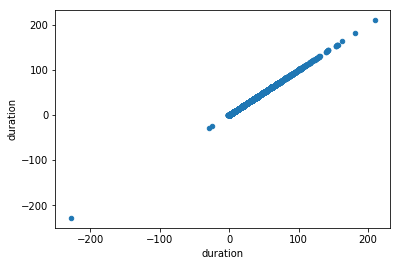

In [388]:
difference = ( offered - expected ) /(100* expected)

In [ ]:
# notice period and duration to join is correlated 
# expected and offered 
# experience and age 
# notice and experience 
# notice and status_en --- 


In [389]:
from pandas.tools.plotting import scatter_matrix

In [390]:
att = ["duration", "experience","notice","difference","status_en"]

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27728ba8>,
      dtype=object)

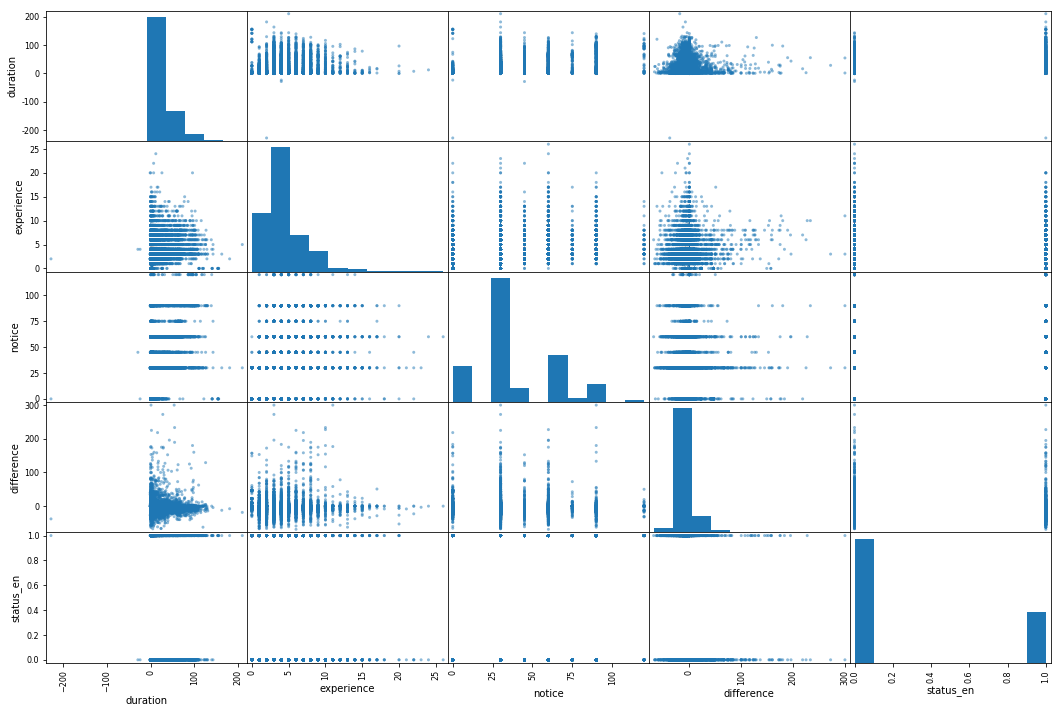

In [391]:
scatter_matrix(dt[att], figsize=(18,12))

In [ ]:
# Category variables 
# "extended","band","bonus","relocate","gender","source","lob","location","status"
#BINARY -     extended, bonus, relocate, gender, status
#NOT-BINARY - band, source, lob, location

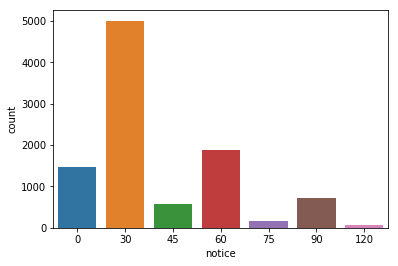

In [392]:
sns.countplot(data = dt, x = 'notice')


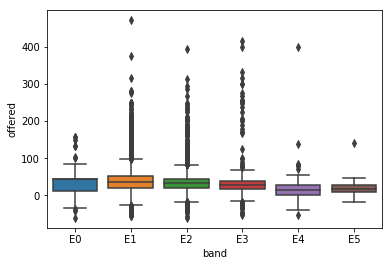

In [397]:
sns.boxplot(data = dt, x='band', y='offered',order=["E0","E1","E2","E3","E4","E5"])

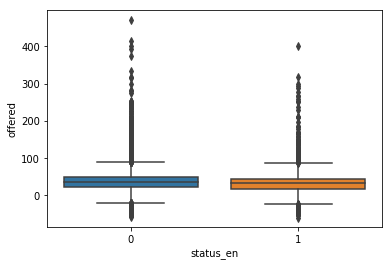

In [396]:
sns.boxplot(data = dt, x='status_en', y='offered')


In [398]:
en = LabelEncoder()
dt_cat = dt["location"]
dt_cat_encoded = en.fit_transform(dt_cat)
dt["location_en"] = dt_cat_encoded

In [402]:
dt.head(20)

,id,extended,duration,notice,band,expected,offered,difference,bonus,relocate,gender,source,experience,lob,location,age,status_en,location_en
2558,2309904,No,NaN,60,E1,69.01,47.89,-12.50,No,No,Female,Direct,3,ERS,Chennai,26,1,2
8048,3250522,Yes,42.0,30,E1,28.57,28.57,0.00,No,No,Male,Agency,3,BFSI,Bangalore,27,0,1
333,3267491,No,1.0,30,E1,80.56,69.44,-6.15,No,No,Male,Employee Referral,1,ERS,Bangalore,30,0,1
8822,3299382,Yes,6.0,45,E1,105.26,105.26,0.00,No,No,Female,Agency,2,ERS,Chennai,24,0,2
7269,3046411,No,24.0,90,E2,41.18,29.41,-8.33,No,No,Male,Employee Referral,6,AXON,Noida,31,1,9
11979,3687033,No,1.0,0,E2,73.33,77.78,2.56,No,Yes,Male,Employee Referral,4,INFRA,Bangalore,34,0,1
6834,2862302,No,13.0,30,E2,2.22,-21.33,-23.04,No,Yes,Male,Direct,5,ERS,Chennai,27,0,2
12297,3815952,Yes,NaN,0,E0,0.00,22.63,22.63,No,No,Female,Direct,0,BSERV,Chennai,34,1,2
5070,2552437,No,1.0,30,E1,38.89,38.89,0.00,No,No,Male,Direct,3,INFRA,Noida,28,0,9
15,2158703,No,44.0,75,E2,45.45,60.00,10.00,No,No,Male,Direct,8,INFRA,Noida,34,1,9


In [400]:
print(en.classes_)

['Ahmedabad' 'Bangalore' 'Chennai' 'Cochin' 'Coimbatore' 'Gurgaon'
 'Hyderabad' 'Kolkata' 'Mumbai' 'Noida' 'Others' 'Pune']


ML algorithms will assume that two nearby values are similar than two distant values. For eg., Numerically 1 and 2 are closer than 5 and 9 but in this context or example, 5(Gurgaon) and 9(Noida) are more closer than 1(Bangalore) and 2(Chennai) 

Noida and Gurgaon are less than 30Kms away 
Bangalore and Chennai are at least 250Kms away 

In [ ]:
# This means categorical to numeric should be done carefully 
# Binary variables - 0 and 1 should be fine 
# For other cases, use OneHotEncoding => for each categorical value, include one feature vector 

In [403]:
dt.drop(columns=["location_en"],inplace=True)

In [ ]:
#BINARY - extended, bonus, relocate, gender

In [404]:
dt.head()

,id,extended,duration,notice,band,expected,offered,difference,bonus,relocate,gender,source,experience,lob,location,age,status_en
2558,2309904,No,NaN,60,E1,69.01,47.89,-12.50,No,No,Female,Direct,3,ERS,Chennai,26,1
8048,3250522,Yes,42.0,30,E1,28.57,28.57,0.00,No,No,Male,Agency,3,BFSI,Bangalore,27,0
333,3267491,No,1.0,30,E1,80.56,69.44,-6.15,No,No,Male,Employee Referral,1,ERS,Bangalore,30,0
8822,3299382,Yes,6.0,45,E1,105.26,105.26,0.00,No,No,Female,Agency,2,ERS,Chennai,24,0
7269,3046411,No,24.0,90,E2,41.18,29.41,-8.33,No,No,Male,Employee Referral,6,AXON,Noida,31,1


In [405]:
cols = ["extended", "bonus", "relocate", "gender"]
encoders = []
for col in cols:
    en = LabelEncoder()
    dt_cat = dt[col]
    dt[col+"_en"] = en.fit_transform(dt_cat)
    encoders.append(en)


In [409]:
encoders[0].classes_

array(['No', 'Yes'], dtype=object)

In [408]:
dt.head()

,id,extended,duration,notice,band,expected,offered,difference,bonus,relocate,...,source,experience,lob,location,age,status_en,extended_en,bonus_en,relocate_en,gender_en
2558,2309904,No,NaN,60,E1,69.01,47.89,-12.50,No,No,...,Direct,3,ERS,Chennai,26,1,0,0,0,0
8048,3250522,Yes,42.0,30,E1,28.57,28.57,0.00,No,No,...,Agency,3,BFSI,Bangalore,27,0,1,0,0,1
333,3267491,No,1.0,30,E1,80.56,69.44,-6.15,No,No,...,Employee Referral,1,ERS,Bangalore,30,0,0,0,0,1
8822,3299382,Yes,6.0,45,E1,105.26,105.26,0.00,No,No,...,Agency,2,ERS,Chennai,24,0,1,0,0,0
7269,3046411,No,24.0,90,E2,41.18,29.41,-8.33,No,No,...,Employee Referral,6,AXON,Noida,31,1,0,0,0,1


In [410]:
dt.drop(columns=cols,inplace=True)

In [412]:
#NOT-BINARY - band, source, lob, location
cols = ["band","source","lob","location"]
for col in cols:
    print(dt[col].unique())

['E1' 'E2' 'E0' 'E3' 'E4' 'E5']
['Direct' 'Agency' 'Employee Referral']
['ERS' 'BFSI' 'AXON' 'INFRA' 'BSERV' 'Healthcare' 'CSMP' 'ETS' 'CORP'
 'EAS' 'SALES' 'MMS']
['Chennai' 'Bangalore' 'Noida' 'Others' 'Gurgaon' 'Pune' 'Hyderabad'
 'Kolkata' 'Mumbai' 'Coimbatore' 'Cochin' 'Ahmedabad']


In [413]:
one_hot = pd.get_dummies(dt['source'])
# Drop column source as it is now encoded
# dt = dt.drop('source',axis = 1) # NOT DROPPING AS WE NEED IT LATER 
# Join the encoded df
dt = dt.join(one_hot)

In [414]:
dt.head()

,id,duration,notice,band,expected,offered,difference,source,experience,lob,location,age,status_en,extended_en,bonus_en,relocate_en,gender_en,Agency,Direct,Employee Referral
2558,2309904,NaN,60,E1,69.01,47.89,-12.50,Direct,3,ERS,Chennai,26,1,0,0,0,0,0,1,0
8048,3250522,42.0,30,E1,28.57,28.57,0.00,Agency,3,BFSI,Bangalore,27,0,1,0,0,1,1,0,0
333,3267491,1.0,30,E1,80.56,69.44,-6.15,Employee Referral,1,ERS,Bangalore,30,0,0,0,0,1,0,0,1
8822,3299382,6.0,45,E1,105.26,105.26,0.00,Agency,2,ERS,Chennai,24,0,1,0,0,0,1,0,0
7269,3046411,24.0,90,E2,41.18,29.41,-8.33,Employee Referral,6,AXON,Noida,31,1,0,0,0,1,0,0,1


In [ ]:
#USING Sklearn - label encoder and onehotencoder 

In [415]:
from sklearn.preprocessing import LabelEncoder
en_source = LabelEncoder()
dt_cat = dt["source"]
dt_cat_encoded = en_source.fit_transform(dt_cat)
dt_cat_encoded

array([1, 0, 2, ..., 0, 2, 1])

In [416]:
# dt_cat_encoded = dt_cat_encoded.reshape(len(dt_cat_encoded),1)
dt_cat_encoded = dt_cat_encoded.reshape(-1,1)
dt_cat_encoded

array([[1],
       [0],
       [2],
       ...,
       [0],
       [2],
       [1]])

In [417]:
en_source.classes_

array(['Agency', 'Direct', 'Employee Referral'], dtype=object)

In [418]:
from sklearn.preprocessing import OneHotEncoder 
en_sr_1hot= OneHotEncoder()
dt_cat_1hot = en_sr_1hot.fit_transform(dt_cat_encoded).toarray()
dt_cat_1hot
#OneHotEncoder takes integer categorical attributes and convert to one hot encoded attributes
# dt => dt_cat_encoded => dt_cat_1hot 
# x columns => x columns with integer categoreis => x + k columns with boolean categorical values
#  0    1      2 
#  0    1      0     => [1]
#  1    0      0    => [0]

/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [419]:
dt_cat_1hot[:,2]

array([0., 0., 1., ..., 0., 1., 0.])

In [420]:
from sklearn.preprocessing import LabelBinarizer
en_source = LabelBinarizer()
dt_cat = dt["source"]
# en = LabelBinarizer(sparse_output=True)  # For sparse matrix 
dt_label_bin = en_source.fit_transform(dt_cat)
dt_label_bin

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [421]:
en_source.classes_
# en_source.inverse_transform()

array(['Agency', 'Direct', 'Employee Referral'], dtype='<U17')

In [422]:
i = 0
for classes in en_source.classes_:
    dt[classes] = dt_label_bin[:,i]
    i += 1
dt.head()

,id,duration,notice,band,expected,offered,difference,source,experience,lob,location,age,status_en,extended_en,bonus_en,relocate_en,gender_en,Agency,Direct,Employee Referral
2558,2309904,NaN,60,E1,69.01,47.89,-12.50,Direct,3,ERS,Chennai,26,1,0,0,0,0,0,1,0
8048,3250522,42.0,30,E1,28.57,28.57,0.00,Agency,3,BFSI,Bangalore,27,0,1,0,0,1,1,0,0
333,3267491,1.0,30,E1,80.56,69.44,-6.15,Employee Referral,1,ERS,Bangalore,30,0,0,0,0,1,0,0,1
8822,3299382,6.0,45,E1,105.26,105.26,0.00,Agency,2,ERS,Chennai,24,0,1,0,0,0,1,0,0
7269,3046411,24.0,90,E2,41.18,29.41,-8.33,Employee Referral,6,AXON,Noida,31,1,0,0,0,1,0,0,1


In [424]:
dt.drop(columns=["source"],axis=1,inplace=True)

In [425]:
cols = ["band","source","lob","location"]
cols.remove("source")

encoders_binarizer = []
for col in cols:
    en = LabelBinarizer()
    dt_cat = dt[col]
    label_bin = en.fit_transform(dt_cat)
    i = 0
    for classes in en.classes_:
        dt[classes] = label_bin[:,i]
        i+= 1
    encoders_binarizer.append(en)
    
dt.head()

,id,duration,notice,band,expected,offered,difference,experience,lob,location,...,Chennai,Cochin,Coimbatore,Gurgaon,Hyderabad,Kolkata,Mumbai,Noida,Others,Pune
2558,2309904,NaN,60,E1,69.01,47.89,-12.50,3,ERS,Chennai,...,1,0,0,0,0,0,0,0,0,0
8048,3250522,42.0,30,E1,28.57,28.57,0.00,3,BFSI,Bangalore,...,0,0,0,0,0,0,0,0,0,0
333,3267491,1.0,30,E1,80.56,69.44,-6.15,1,ERS,Bangalore,...,0,0,0,0,0,0,0,0,0,0
8822,3299382,6.0,45,E1,105.26,105.26,0.00,2,ERS,Chennai,...,1,0,0,0,0,0,0,0,0,0
7269,3046411,24.0,90,E2,41.18,29.41,-8.33,6,AXON,Noida,...,0,0,0,0,0,0,0,1,0,0


In [431]:
# TEXT DATA - (NO,YES) , (FEMALE,MALE), (London,Paris,Tokyo)
# NUMERIC DATA - (1,2,3,4,5,...) (10,20,40,50,100)
# CATEGORIES  - For ex., (1,2), (NO,YES) , (FEMALE,MALE), (London,Paris,Tokyo)
# Text data => numeric categories => one hot encodeded columns 
# review => text data! 
# This is one example where text data is not categorical!!!! 
encoders_binarizer[1].classes_

array(['AXON', 'BFSI', 'BSERV', 'CORP', 'CSMP', 'EAS', 'ERS', 'ETS',
       'Healthcare', 'INFRA', 'MMS', 'SALES'], dtype='<U10')

In [426]:
dt.drop(columns=cols,inplace=True)
dt.head()

,id,duration,notice,expected,offered,difference,experience,age,status_en,extended_en,...,Chennai,Cochin,Coimbatore,Gurgaon,Hyderabad,Kolkata,Mumbai,Noida,Others,Pune
2558,2309904,NaN,60,69.01,47.89,-12.50,3,26,1,0,...,1,0,0,0,0,0,0,0,0,0
8048,3250522,42.0,30,28.57,28.57,0.00,3,27,0,1,...,0,0,0,0,0,0,0,0,0,0
333,3267491,1.0,30,80.56,69.44,-6.15,1,30,0,0,...,0,0,0,0,0,0,0,0,0,0
8822,3299382,6.0,45,105.26,105.26,0.00,2,24,0,1,...,1,0,0,0,0,0,0,0,0,0
7269,3046411,24.0,90,41.18,29.41,-8.33,6,31,1,0,...,0,0,0,0,0,0,0,1,0,0


In [427]:
corr_mtx = dt.drop(columns=["id"]).corr()
corr_mtx["status_en"].sort_values(ascending=False)

status_en            1.000000
notice               0.247075
experience           0.096826
ERS                  0.093568
Agency               0.092651
BFSI                 0.077283
Bangalore            0.073962
duration             0.060661
E2                   0.038481
EAS                  0.036133
ETS                  0.034185
gender_en            0.027543
Chennai              0.024351
Healthcare           0.023364
Hyderabad            0.019115
AXON                 0.016082
E1                   0.012648
Kolkata              0.006499
bonus_en             0.006065
Pune                 0.004175
Gurgaon              0.003329
E3                   0.002121
E4                  -0.002086
E5                  -0.004200
Cochin              -0.004573
expected            -0.005263
Ahmedabad           -0.006818
MMS                 -0.007925
CSMP                -0.011348
Mumbai              -0.015527
Direct              -0.015630
Others              -0.021475
CORP                -0.032932
SALES     

In [429]:
dt["BSERV"].head(20)

2558     0
8048     0
333      0
8822     0
7269     0
11979    0
6834     0
12297    1
5070     0
15       0
310      0
7726     0
1120     0
11767    0
5315     0
10768    0
6360     0
2814     0
5529     0
10839    1
Name: BSERV, dtype: int64

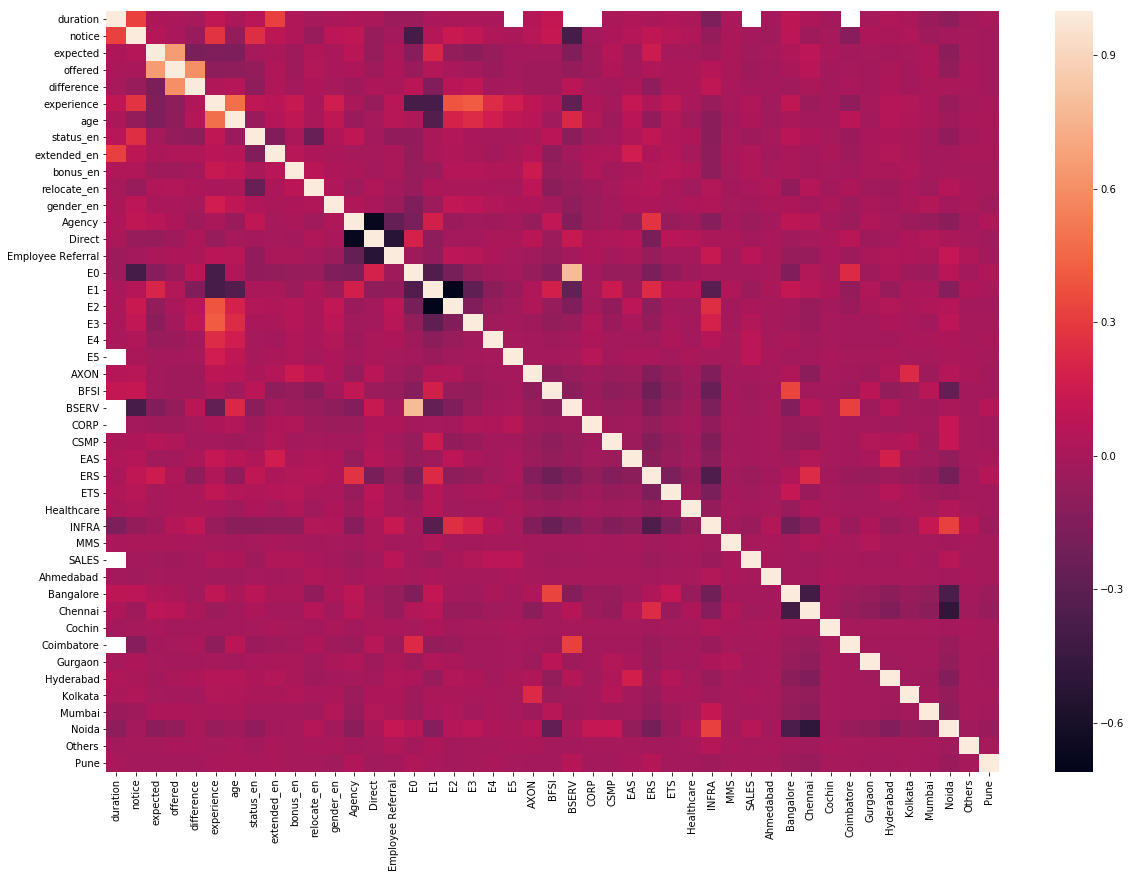

In [432]:
fig, ax = plt.subplots(figsize=(20,14))         # Sample figsize in inches
# sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(corr_mtx,ax=ax)

In [ ]:
# NEW Insights - 
# Candidates hired through Agency have higher chances of not joining
# Similarly 
# Candidates who asked for extended joining date are correlated with higher chances of joining
# Similarly, INFRA, BSERV (line of businesses) 


No handles with labels found to put in legend.


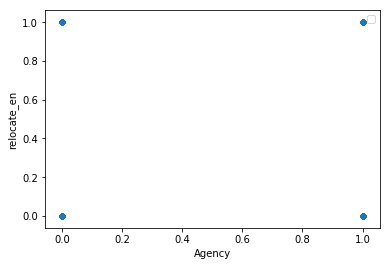

In [433]:
ax = dt.plot(kind="scatter", x="Agency", y="relocate_en",alpha=1)

plt.legend()

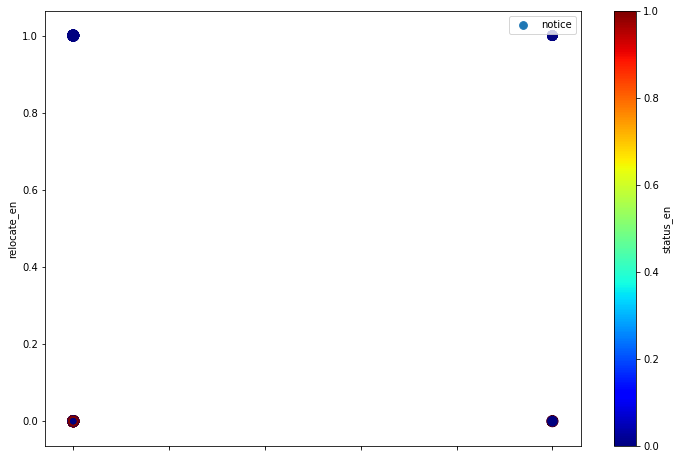

In [434]:
ax = dt.plot(kind="scatter", x="Agency", y="relocate_en",alpha=1,
            s=dt["notice"], label="notice", 
            c="status_en", cmap=plt.get_cmap("jet"), colorbar=True,figsize=(12,8))

plt.legend()

In [ ]:
# HAndle missing values - duration, offered, expected, difference 
# All are continuous variables 
# Duration is dependent on 

In [435]:
dt.head()

,id,duration,notice,expected,offered,difference,experience,age,status_en,extended_en,...,Chennai,Cochin,Coimbatore,Gurgaon,Hyderabad,Kolkata,Mumbai,Noida,Others,Pune
2558,2309904,NaN,60,69.01,47.89,-12.50,3,26,1,0,...,1,0,0,0,0,0,0,0,0,0
8048,3250522,42.0,30,28.57,28.57,0.00,3,27,0,1,...,0,0,0,0,0,0,0,0,0,0
333,3267491,1.0,30,80.56,69.44,-6.15,1,30,0,0,...,0,0,0,0,0,0,0,0,0,0
8822,3299382,6.0,45,105.26,105.26,0.00,2,24,0,1,...,1,0,0,0,0,0,0,0,0,0
7269,3046411,24.0,90,41.18,29.41,-8.33,6,31,1,0,...,0,0,0,0,0,0,0,1,0,0


In [436]:
corr_mtx["duration"].sort_values(ascending=False)

duration             1.000000
notice               0.327403
extended_en          0.319640
BFSI                 0.107716
experience           0.092991
Bangalore            0.085619
status_en            0.060661
AXON                 0.057132
EAS                  0.029917
bonus_en             0.027827
Hyderabad            0.026342
ETS                  0.025580
Agency               0.023406
Chennai              0.022722
expected             0.018666
ERS                  0.016088
Healthcare           0.014301
E3                   0.013602
Direct               0.012443
gender_en            0.012391
offered              0.011642
age                  0.011398
CSMP                 0.009897
Kolkata              0.007393
E2                   0.006050
MMS                  0.003301
E1                   0.003280
Pune                 0.002066
E4                  -0.001431
difference          -0.001710
relocate_en         -0.003654
Gurgaon             -0.005016
Others              -0.016408
Cochin    

In [462]:
dt[["duration","extended_en","notice","BFSI","Bangalore","INFRA","Noida"]]
X = ["extended_en","notice","BFSI","Bangalore","INFRA","Noida"]
y = ["duration"]
data_set = dt[["duration","extended_en","notice","BFSI","Bangalore","INFRA","Noida"]]


In [438]:
med = dt.duration.median()
med

9.0

In [ ]:
# MISSING VALUES - 
# 1. fill it be mean/median of that column
# 2. remove tht row
# 3. do regression analysis for that column 

# 1. Find the correlation for the column which has missing values 
# 2. take all the columns which have high correlation values 
# 3. Assume them to be indepdendent variables
# 4. assume your missing value column to be target/dependent variable in regression analysis
# 5. Build a regression model from these vars
# 6. predict...

In [439]:
dt.duration.mean()

21.33142037302726

In [442]:
print(dt[dt.notice==0].duration.median())
dt[dt.notice==30].duration.median()

2.0


8.0

In [443]:
dt["duration"].fillna(med,inplace=True)

2558      9.0
8048     42.0
333       1.0
8822      6.0
7269     24.0
11979     1.0
6834     13.0
12297     9.0
5070      1.0
15       44.0
310      10.0
7726     63.0
1120      1.0
11767     5.0
5315     75.0
10768     4.0
6360      4.0
2814     40.0
5529      2.0
10839     9.0
11306    17.0
6883     14.0
3871     15.0
141      67.0
3664     94.0
9473     37.0
306      17.0
3373      4.0
3808      9.0
6442     29.0
         ... 
2844      9.0
703      36.0
11565     9.0
7972     44.0
12074     4.0
659       3.0
7740     55.0
5193      0.0
9741     27.0
5437      1.0
6892     40.0
4482      7.0
7525     19.0
2005      3.0
8391     28.0
889       0.0
7295     26.0
5794     22.0
7900     97.0
3613      9.0
8318     20.0
1992      3.0
2443      0.0
8740      0.0
12248     9.0
9201      9.0
2488      1.0
7532     28.0
7291      4.0
519      13.0
Name: duration, Length: 9867, dtype: float64

In [ ]:
# PRACTICE AT HOME 
# Build a regression model using "extended_en","notice","BFSI","Bangalore","INFRA","Noida" as independent variables
# Take all rows where duration is non null => distribute into 80-20 split of train-test split
# Predict for all those rows where duration is null 
# Final equation is like 
# dt["duration"].fillna(model.predict(dt[dt["duration"].isna()][["extended_en","notice","BFSI","Bangalore","INFRA","Noida"]]))
# OR
# nan_rows = dt[dt["duration"].isna()][["extended_en","notice","BFSI","Bangalore","INFRA","Noida"]]
# vals = model.predict(nan_rows)
# dt["duration"].fillna(vals) 

In [ ]:
dt["duration"].fillna(med,inplace=True)

In [444]:
dt[["expected","offered", "difference"]]

,expected,offered,difference
2558,69.01,47.89,-12.50
8048,28.57,28.57,0.00
333,80.56,69.44,-6.15
8822,105.26,105.26,0.00
7269,41.18,29.41,-8.33
11979,73.33,77.78,2.56
6834,2.22,-21.33,-23.04
12297,0.00,22.63,22.63
5070,38.89,38.89,0.00
15,45.45,60.00,10.00


In [ ]:
# THINK carefully how to fill missing values in these three columns 

In [ ]:
# Should we fill difference or expected or offered missing values first ? 
#  difference = ( offered - expected ) /(100* expected)

In [445]:
dt[dt["difference"].isna()][["expected","offered", "difference"]]

,expected,offered,difference
3651,NaN,16.36,NaN
5172,NaN,NaN,NaN
2225,NaN,NaN,NaN
9569,10.29,NaN,NaN
1619,NaN,NaN,NaN
10521,33.93,NaN,NaN
2234,NaN,NaN,NaN
3896,NaN,42.86,NaN
2050,69.74,NaN,NaN
1781,NaN,NaN,NaN


In [446]:
dt[(dt["expected"].isna()) &(dt["offered"].isna()) ][["expected","offered", "difference"]]

,expected,offered,difference
5172,NaN,NaN,NaN
2225,NaN,NaN,NaN
1619,NaN,NaN,NaN
2234,NaN,NaN,NaN
5139,NaN,NaN,0.0
1781,NaN,NaN,NaN
1655,NaN,NaN,NaN
966,NaN,NaN,0.0
2108,NaN,NaN,NaN
2250,NaN,NaN,NaN


In [447]:
dt[(dt["expected"].isna()) & (~dt["offered"].isna()) ][["expected","offered", "difference"]]

,expected,offered,difference
3651,NaN,16.36,NaN
3896,NaN,42.86,NaN
6574,NaN,24.03,NaN
778,NaN,104.13,NaN
2139,NaN,42.86,NaN
10060,NaN,48.53,NaN
4834,NaN,12.48,NaN
7994,NaN,20.37,NaN
7423,NaN,4.00,NaN
2380,NaN,11.11,NaN


In [448]:
dt[(~dt["expected"].isna()) & (dt["offered"].isna()) ][["expected","offered", "difference"]]

,expected,offered,difference
9569,10.29,NaN,NaN
10521,33.93,NaN,NaN
2050,69.74,NaN,NaN
1471,25.00,NaN,NaN
4370,19.23,NaN,NaN
1106,33.66,NaN,NaN
1921,71.43,NaN,NaN
2308,8.62,NaN,NaN
1974,66.67,NaN,NaN
6941,36.36,NaN,NaN


In [ ]:
# Expected not null , offered null = 122
# Expected null , offered not null = 232
# Both null = 364
# Sum = 718 
# Difference is null = 672  ( 718-672 have 0.0 ) 

In [ ]:
# One strategy can be to fill nan in offered as the value in expected or vice versa 
# and fill difference as 0.0

In [ ]:
# can we fill difference with 0.0  now ? 
# WHY or Why not 

In [449]:
dt["expected"].fillna(dt["offered"],inplace=True)

In [450]:
dt["offered"].fillna(dt["expected"],inplace=True)

In [ ]:
# Now can we fill difference with 0.0 ? 
# WHY or Why not 

In [451]:
dt["expected"].mean()

41.56005258729433

In [452]:
med_expected = dt["expected"].median()
med_expected

38.93

In [453]:
dt["offered"].mean()

37.64554059739097

In [454]:
med_offered = dt["offered"].median()
med_offered

34.62

In [455]:
dt["expected"].fillna(med_expected,inplace=True)


In [456]:
dt["offered"].fillna(med_offered,inplace=True)


In [ ]:
# Now can we fill difference with 0.0 ? 
# WHY or Why not 

In [457]:
dt[dt["difference"].isna()][["expected","offered", "difference"]]

,expected,offered,difference
3651,16.36,16.36,NaN
5172,38.93,34.62,NaN
2225,38.93,34.62,NaN
9569,10.29,10.29,NaN
1619,38.93,34.62,NaN
10521,33.93,33.93,NaN
2234,38.93,34.62,NaN
3896,42.86,42.86,NaN
2050,69.74,69.74,NaN
1781,38.93,34.62,NaN


In [458]:
val = ( dt["offered"] - dt["expected"] ) / (100+dt["expected"])
val

2558    -0.124963
8048     0.000000
333     -0.061586
8822     0.000000
7269    -0.083369
11979    0.025674
6834    -0.230385
12297    0.226300
5070     0.000000
15       0.100034
310      0.000000
7726    -0.011120
1120     0.000000
11767   -0.111143
5315    -0.180042
10768    0.000000
6360     0.060009
2814    -0.261503
5529    -0.039974
10839   -0.093781
11306    0.000000
6883     0.000000
3871     0.166753
141      0.061440
3664    -0.119986
9473    -0.072741
306      1.272750
3373    -0.115385
3808     0.000000
6442    -0.333333
           ...   
2844    -0.023077
703      0.000000
11565   -0.022645
7972    -0.099968
12074    0.000000
659      0.000000
7740     0.000000
5193     0.000000
9741     0.000000
5437    -0.124953
6892    -0.133346
4482     0.000000
7525     0.000000
2005     0.000000
8391    -0.133299
889     -0.047595
7295     0.000000
5794     0.000000
7900    -0.066640
3613    -0.330768
8318    -0.090902
1992     0.000000
2443    -0.031023
8740     0.000000
12248   -0

In [459]:
dt["difference"].fillna(val,inplace=True)

In [ ]:
#DO IT YOURSELF FROM HERE 


In [ ]:
#GET TRAINING DATa, Labels like given below 
y= dt["status_en"]
X = dt.drop("status_en",axis=1)

# HOW TO GET TEST DATA after preprocessing!! 
#HINT : DO ALL THE DATA TRANSFORMATION WE DID ON TRAINING DATA on TEST data 

In [ ]:
#MODEL BUILDING 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(<X/ Trainingdata>,<y/labels>)
#MODEL EVALUATION

#MODEL TUNING using validation set


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(rfc, <FILL_TRAINING_DATA>,<FILL_LABELS>, cv=3, method="predict_proba")

In [461]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()

In [463]:
dt = ss.fit_transform(dt)


/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [ ]:
# DTree doesn't get  impacted much due to scaling/norm.
#SVM does get impacted due to scaling
# 1. model selection - dtree => randomforest => svm => sgd classifier=> logistic classifier => knn
# In given dataset, 30% are negative(Did not join) samples, 70% are positive (joined) 
# WHAT if 2% wre negative!! ??
# Model which can always predict positive => 98% accurate!! , still a bad model 
# Hence model evaluation is important 
# 2. model evaluation 
# precision,recall,f1 score, ruc auc , accuracy, confusion matrix 
# 3. HyperTuning of parameters by retraining/validation


Any queries - please reach out to ---- 

mail@ - pradeep@machinelearningaptitude.com 

https://www.linkedin.com/in/pradeepud/ - LinkedIn profile 

www.machinelearningaptitude.com - Interview preparation